# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [93]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

# Libraries for data preparation and model building
"import *"

# Setting global constants to ensure notebook results are reproducible
"PARAMETER_CONSTANT = ###"

'PARAMETER_CONSTANT = ###'

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [94]:
df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


**Merging df_train and df_test**:

In [95]:
# we merge our train and test datasets so that we can clean both at the same time
# we will seperate the last 2920 tests data rows again after the data has been cleaned
df = pd.concat([df_train, df_test])

**Data Overview**:

In [96]:
# use the df.head() function have a look at the first two rows of data.
# which columns are catagorical and which are numerical?
# how many are there of each?
df.head(2)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667


In [97]:
# use the df.tail() function to have a look at the last two rows of the data.
# these rows are part of the test dataset, therefore the load_shortfall_3h will be null since this is the y-variable we will need to predict
df.tail(2)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
2918,11681,2018-12-31 18:00:00,1.000000,level_6,0.0,2.000000,52.666667,56.666667,0.0,0.666667,...,285.150000,284.473333,280.15,281.626667,283.150000,282.816667,287.483333,283.813333,282.150000,NaN
2919,11682,2018-12-31 21:00:00,1.333333,level_10,0.0,2.333333,61.666667,69.333333,0.0,1.333333,...,276.816667,281.133333,276.15,276.450000,278.483333,276.816667,283.816667,276.623333,276.483333,NaN


In [98]:
# use df.shape to determine how many rows and columns there are
df.shape 
# there are 8763 rows and 49 columns

(11683, 49)

In [99]:
# use df_train.columns to see what our columns are
df.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

In [100]:
# use the df.(info) function to confirm categorical and numerical features, and check for any null and missing values.
df.info() 
# since there are 49 columns, this section doesn't give us a breakdown of all the information


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11683 entries, 0 to 2919
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            11683 non-null  int64  
 1   time                  11683 non-null  object 
 2   Madrid_wind_speed     11683 non-null  float64
 3   Valencia_wind_deg     11683 non-null  object 
 4   Bilbao_rain_1h        11683 non-null  float64
 5   Valencia_wind_speed   11683 non-null  float64
 6   Seville_humidity      11683 non-null  float64
 7   Madrid_humidity       11683 non-null  float64
 8   Bilbao_clouds_all     11683 non-null  float64
 9   Bilbao_wind_speed     11683 non-null  float64
 10  Seville_clouds_all    11683 non-null  float64
 11  Bilbao_wind_deg       11683 non-null  float64
 12  Barcelona_wind_speed  11683 non-null  float64
 13  Barcelona_wind_deg    11683 non-null  float64
 14  Madrid_clouds_all     11683 non-null  float64
 15  Seville_wind_speed  

In [101]:
# using the df.isnull().sum() function, we can determine if there are any null values in the data
df.isnull().sum()
# since there are 49 columns, this section doesn't give us a breakdown of all the information
# the load_shortfall_3h (from the test data) will be null since this is the y-variable we will need to predict

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2522
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

**Data breakdown:**

df_time_y:

In [102]:
# since we are not able to see the entire dataframe, let's break it up in sections to get a better understanding
# df_1 will include the 'unnamed: 0', 'time', and 'load_shortfall_3h' columns
df_time_y = df[['Unnamed: 0', 'time', 'load_shortfall_3h']]

In [103]:
# let's print the first two rows of df_time_y
df_time_y.head(2)

,Unnamed: 0,time,load_shortfall_3h
0,0,2015-01-01 03:00:00,6715.666667
1,1,2015-01-01 06:00:00,4171.666667


df_Barcelona:

In [104]:
# df_Barcelona will include the 'Barcelona_weather_id' , 'Barcelona_wind_speed', 'Barcelona_wind_deg' , 'Barcelona_temp', 'Barcelona_temp_min', 
# 'Barcelona_temp_max' , 'Barcelona_rain_1h', 'Barcelona_rain_3h' , 'Barcelona_pressure' columns
df_Barcelona = df[['Barcelona_weather_id' , 'Barcelona_wind_speed', 'Barcelona_wind_deg' , 'Barcelona_temp', 'Barcelona_temp_min', 
           'Barcelona_temp_max' , 'Barcelona_rain_1h', 'Barcelona_rain_3h' , 'Barcelona_pressure']]

In [105]:
# let's print the first two rows of df_Barcelona
df_Barcelona.head(2)

,Barcelona_weather_id,Barcelona_wind_speed,Barcelona_wind_deg,Barcelona_temp,Barcelona_temp_min,Barcelona_temp_max,Barcelona_rain_1h,Barcelona_rain_3h,Barcelona_pressure
0,800.0,6.333333,42.666667,281.013000,281.013000,281.013000,0.0,0.0,1036.333333
1,800.0,4.000000,139.000000,280.561667,280.561667,280.561667,0.0,0.0,1037.333333


df_Bilbao:

In [106]:
# df_Bilbao will include the 'Bilbao_temp' , 'Bilbao_temp_min' , 'Bilbao_temp_max' , 'Bilbao_rain_1h', 'Bilbao_snow_3h', 'Bilbao_pressure','Bilbao_clouds_all' columns
df_Bilbao = df[['Bilbao_temp' , 'Bilbao_temp_min' , 'Bilbao_temp_max' , 'Bilbao_rain_1h', 'Bilbao_snow_3h', 'Bilbao_pressure','Bilbao_clouds_all']]

In [107]:
# let's print the first two rows of df_Bilbao
df_Bilbao.head(2)

,Bilbao_temp,Bilbao_temp_min,Bilbao_temp_max,Bilbao_rain_1h,Bilbao_snow_3h,Bilbao_pressure,Bilbao_clouds_all
0,269.338615,269.338615,269.338615,0.0,0.0,1035.000000,0.0
1,270.376000,270.376000,270.376000,0.0,0.0,1035.666667,0.0


df_Madrid:

In [108]:
# df_Madrid will include the 'Madrid_weather_id' , 'Madrid_wind_speed', 'Madrid_temp' , 'Madrid_temp_min' , 'Madrid_temp_max' ,'Madrid_rain_1h' , 
# 'Madrid_pressure' , 'Madrid_clouds_all' , 'Madrid_humidity' columns
df_Madrid = df[['Madrid_weather_id' , 'Madrid_wind_speed', 'Madrid_temp' , 'Madrid_temp_min' , 'Madrid_temp_max' , 'Madrid_rain_1h' , 
           'Madrid_pressure' , 'Madrid_clouds_all' , 'Madrid_humidity']]

In [109]:
# let's print the first two rows of df_Madrid
df_Madrid.head(2)

,Madrid_weather_id,Madrid_wind_speed,Madrid_temp,Madrid_temp_min,Madrid_temp_max,Madrid_rain_1h,Madrid_pressure,Madrid_clouds_all,Madrid_humidity
0,800.0,0.666667,265.938000,265.938000,265.938000,0.0,971.333333,0.0,64.000000
1,800.0,0.333333,266.386667,266.386667,266.386667,0.0,972.666667,0.0,64.666667


df_Seville

In [110]:
# df_Seville will include the 'Seville_weather_id' , 'Seville_wind_speed' , 'Seville_temp' , 'Seville_temp_min' , 'Seville_temp_max' , 'Seville_rain_1h' , 
# 'Seville_rain_3h' , 'Seville_pressure' , 'Seville_clouds_all' , 'Seville_humidity' columns
df_Seville = df[['Seville_weather_id' , 'Seville_wind_speed' , 'Seville_temp' , 'Seville_temp_min' , 'Seville_temp_max' , 'Seville_rain_1h' , 
           'Seville_rain_3h' , 'Seville_pressure' , 'Seville_clouds_all' , 'Seville_humidity']]

In [111]:
# let's print the first two rows of df_Seville
df_Seville.head(2)

,Seville_weather_id,Seville_wind_speed,Seville_temp,Seville_temp_min,Seville_temp_max,Seville_rain_1h,Seville_rain_3h,Seville_pressure,Seville_clouds_all,Seville_humidity
0,800.0,3.333333,274.254667,274.254667,274.254667,0.0,0.0,sp25,0.0,74.333333
1,800.0,3.333333,274.945000,274.945000,274.945000,0.0,0.0,sp25,0.0,78.333333


df_Valencia:

In [112]:
# df_Valencia will include the 'Valencia_wind_speed' , 'Valencia_wind_deg', 'Valencia_temp' , 'Valencia_temp_max' , 'Valencia_temp_min' , 'Valencia_snow_3h' , 
# 'Valencia_pressure', 'Valencia_humidity' columns
df_Valencia = df[['Valencia_wind_speed' , 'Valencia_wind_deg', 'Valencia_temp' , 'Valencia_temp_max' , 'Valencia_temp_min' , 'Valencia_snow_3h' , 
           'Valencia_pressure', 'Valencia_humidity']]

In [113]:
# let's print the first two rows of df_Valencia
df_Valencia.head(2)

,Valencia_wind_speed,Valencia_wind_deg,Valencia_temp,Valencia_temp_max,Valencia_temp_min,Valencia_snow_3h,Valencia_pressure,Valencia_humidity
0,0.666667,level_5,269.888000,269.888000,269.888000,0.0,1002.666667,75.666667
1,1.666667,level_10,271.728333,271.728333,271.728333,0.0,1004.333333,71.000000


In [114]:
# using the df.isnull().sum() function, we can determine if there are any null values in the data
df_Valencia.isnull().sum()
# we can see that the column 'Valencia_pressure' has a large amount of null values

Valencia_wind_speed       0
Valencia_wind_deg         0
Valencia_temp             0
Valencia_temp_max         0
Valencia_temp_min         0
Valencia_snow_3h          0
Valencia_pressure      2522
Valencia_humidity         0
dtype: int64

<AxesSubplot:xlabel='Valencia_pressure'>

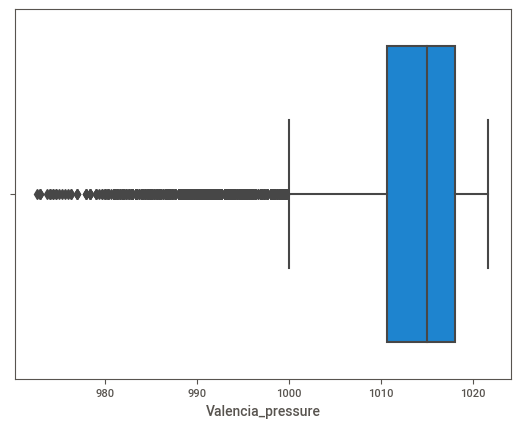

In [115]:
sns.boxplot(df['Valencia_pressure'])

In [116]:
# let's look at the statistics of df_Valencia
df.Valencia_pressure.describe()

count    9161.000000
mean     1012.346687
std         8.817473
min       972.666667
25%      1010.666667
50%      1015.000000
75%      1018.000000
max      1021.666667
Name: Valencia_pressure, dtype: float64

In [117]:
# we want to know the mode of the data set too
print('Mode:') 
print(df['Valencia_pressure'].mode())
# we will use this mode in order to replace the missing values in this column

Mode:
0    1018.0
Name: Valencia_pressure, dtype: float64


Data Statistics:

In [118]:
# the df.describe function determines the count, mean, standard deviation, minimum, Q1, Q2, Q3, and maximum for each column of the data.
df.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,...,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,8763.000000
mean,5841.000000,2.433750,0.118698,2.692873,63.774687,58.721818,43.440712,1.958629,14.155268,159.878855,...,289.377372,289.869413,284.993657,286.447784,288.616766,288.095397,291.263219,288.282055,287.056222,10673.857612
std,3372.735932,1.831762,0.334918,2.321759,22.219380,24.390621,32.046215,1.696043,24.541321,101.005654,...,9.594562,6.680538,6.730076,6.738466,6.391989,6.898601,8.136234,9.258559,9.093455,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2920.500000,1.000000,0.000000,1.000000,46.333333,38.000000,12.000000,1.000000,0.000000,76.666667,...,282.150000,284.816667,280.122526,281.483448,284.150000,283.150000,285.483333,281.250000,280.150000,7390.333333
50%,5841.000000,2.000000,0.000000,2.000000,67.000000,59.333333,45.000000,1.333333,0.000000,145.666667,...,287.843333,289.426667,284.816667,286.193333,288.276333,287.816667,290.382000,286.923333,285.816667,11114.666667
75%,8761.500000,3.333333,0.100000,3.666667,83.000000,80.000000,75.000000,2.666667,20.000000,233.333333,...,296.483333,295.150000,289.816667,291.040000,293.483333,292.483333,296.641333,294.993167,293.708917,14498.166667
max,11682.000000,13.333333,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,360.000000,...,314.483333,308.150000,309.816667,310.710000,306.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [119]:
# kurtosis() is the measure of outliers present in the data. 
# **High kurtosis (>3)** indicates a large number of outliers.
# **low kurtosis (<3)** a lack of outliers.
df.kurtosis()
# high outliers: Bilbao_rain_1h, Valencia_wind_speed, Bilbao_wind_speed, Barcelona_rain_1h, Seville_rain_1h, Bilbao_snow_3h, Barcelona_pressure, Seville_rain_3h, Madrid_rain_1h, Barcelona_rain_3h, Valencia_snow_3h, Madrid_weather_id, Barcelona_weather_id
# low outliers: Madrid_wind_speed, Seville_humidity, Madrid_humidity, Bilbao_clouds_all, Seville_clouds_all, Bilbao_wind_deg, Barcelona_wind_speed, Barcelona_wind_deg, Madrid_clouds_all, Seville_wind_speed, Bilbao_pressure, Seville_temp_min, Madrid_temp, Madrid_temp_min, load_shortfall_3h


Unnamed: 0                -1.200000
Madrid_wind_speed          2.156333
Bilbao_rain_1h            40.584429
Valencia_wind_speed       31.014311
Seville_humidity          -0.950169
Madrid_humidity           -1.151940
Bilbao_clouds_all         -1.519626
Bilbao_wind_speed          3.159652
Seville_clouds_all         1.950894
Bilbao_wind_deg           -1.064464
Barcelona_wind_speed       1.519692
Barcelona_wind_deg        -0.967252
Madrid_clouds_all         -0.076188
Seville_wind_speed         1.745508
Barcelona_rain_1h        130.956428
Seville_rain_1h           79.440881
Bilbao_snow_3h          1075.823322
Barcelona_pressure      4916.988101
Seville_rain_3h          552.067395
Madrid_rain_1h            63.372354
Barcelona_rain_3h        251.188884
Valencia_snow_3h        5452.830025
Madrid_weather_id          8.018543
Barcelona_weather_id       5.932283
Bilbao_pressure            1.847650
Seville_weather_id        10.402060
Valencia_pressure          2.939921
Seville_temp_max          -0

In [120]:
# creating a function to calculate outliers in each column

def find_outliers_iqr(column):
    # Calculate the IQR (Interquartile Range)
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers using the lower and upper bounds
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Example usage:
# Assuming 'data' is your DataFrame and 'column_name' is the column you want to analyze
# outliers = find_outliers_iqr(data['column_name'])
# print(outliers)


In [121]:
find_outliers_iqr(df['Valencia_snow_3h'])

269    0.208333
270    0.791667
271    0.750000
278    0.016667
279    0.033333
Name: Valencia_snow_3h, dtype: float64

In [122]:
df.Valencia_snow_3h.describe()

count    11683.000000
mean         0.000154
std          0.010277
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.791667
Name: Valencia_snow_3h, dtype: float64

**Feature Interactions**:

In [123]:
# plot relevant feature interactions

**Evaluate Correlation**:

In [124]:
# evaluate correlation

In [125]:
# have a look at feature distributions
# use df.skew() to determine the skewness of the data.
df.skew()
# fairly semetrical: Seville_humidity, Madrid_humanity, Bilbao_clouds_all, Barcelona_wind_deg, Bilbao_wind_deg, Seville_temp_min, Madrid_temp, Madrid_temp_min, load_shortfall_3h
# moderate negative skew: Bilbao_pressure
# high negative skew: Madrid_weather_id, Barcelona_weather_id
# high positive skew: Madrid_wind_speed, Bilbao_rain_1h, Valencia_wind_speed, Bilbao_wind_speed, Seville_clouds_all, Barcelona_wind_speed, Madrid_clouds_all, Seville_wind_speed, Barcelona_rain_1h, Seville_rain_1h, Bilbao_snow_3h, Barcelona_pressure, Seville_rain_3h, Madrid_rain_1h, Barcelona_rain_3h, Valencia_snow_3h
# the skewness which is most prevalent is 'high positive skew'. 

Unnamed: 0               0.000000
Madrid_wind_speed        1.452792
Bilbao_rain_1h           5.694539
Valencia_wind_speed      3.116352
Seville_humidity        -0.366033
Madrid_humidity         -0.076590
Bilbao_clouds_all       -0.068335
Bilbao_wind_speed        1.602522
Seville_clouds_all       1.765104
Bilbao_wind_deg          0.246848
Barcelona_wind_speed     1.072417
Barcelona_wind_deg      -0.140337
Madrid_clouds_all        1.158486
Seville_wind_speed       1.213437
Barcelona_rain_1h        9.833191
Seville_rain_1h          7.535944
Bilbao_snow_3h          30.237039
Barcelona_pressure      66.949053
Seville_rain_3h         22.349167
Madrid_rain_1h           6.446514
Barcelona_rain_3h       14.668923
Valencia_snow_3h        73.090853
Madrid_weather_id       -2.909054
Barcelona_weather_id    -2.595417
Bilbao_pressure         -0.977531
Seville_weather_id      -3.230498
Valencia_pressure       -1.800572
Seville_temp_max         0.122162
Madrid_pressure         -2.140249
Valencia_temp_

**EDA programs**:

In [126]:
import sweetviz as sv
analyze_report = sv.analyze(df)
analyze_report.show_html('report.html', open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated.


In [127]:
# show the report in a form of an HTML file
analyze_report.show_html('report.html')

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

**Remove Missing Vlaues and Redundant Features**:

In [128]:
df_clean = df

In [129]:
# the 'Unnamed: 0' column is redundant since it is the same as the inxeding column, therefore we removed this column.
df_clean.drop(columns=['Unnamed: 0'], inplace=True)

In [130]:
# replace the null values in 'Valencia_pressure' with the mode
df_clean['Valencia_pressure'] = df_clean['Valencia_pressure'].fillna(df_clean['Valencia_pressure'].mode()[0])

In [131]:
# using the df.isnull().sum() function to see if there are still any null values
df_clean.Valencia_pressure.isnull().sum()
# we can see that the column 'Valencia_pressure' has no more null values

0

**Create New Features**:

Covert 'time' into datetime:

In [132]:
# Convert the 'time' column to datetime format
df_clean['time'] = pd.to_datetime(df_clean['time'])

Seperate the 'time' and 'date':

In [133]:
# Split 'time' column into 'date' and 'time' columns
df_clean['date'] = df_clean['time'].dt.date
df_clean['time'] = df_clean['time'].dt.time

# Create a new DataFrame with 'date' and 'time' columns
df_clean = pd.DataFrame(df)

In [ ]:
df_clean.time

0       03:00:00
1       06:00:00
2       09:00:00
3       12:00:00
4       15:00:00
          ...   
2915    09:00:00
2916    12:00:00
2917    15:00:00
2918    18:00:00
2919    21:00:00
Name: time, Length: 11683, dtype: object

Covert the 'date' into datetime:

In [ ]:
# Convert the 'date' column to datetime format
df_clean['date'] = pd.to_datetime(df_clean['date'])

Seperate the 'date' into 'year', 'month', 'day', and 'season':

In [ ]:
# Extract year, month, and day from the 'date' column
df_clean['year'] = df_clean['date'].dt.year
df_clean['month'] = df_clean['date'].dt.month
df_clean['day'] = df_clean['date'].dt.day

# Define a function to classify months into seasons
def get_season(month):
    if month in [3, 4, 5]:  # Spring: March (3) to May (5)
        return 2 # 2 = spring, coverted to an int for workability
    elif month in [6, 7, 8]:  # Summer: June (6) to August (8)
        return 3 # 3 = summer, coverted to an int for workability
    elif month in [9, 10, 11]:  # Autumn: September (9) to November (11)
        return 4 # 4 = autumn, coverted to an int for workability
    else:  # Winter: December (12), January (1), February (2)
        return 1 # 1 = winter, coverted to an int for workability

# Apply the function to create a new 'season' column based on the 'month' column
df_clean['season'] = df_clean['month'].apply(get_season)

# Create a new DataFrame with 'year', 'month', 'day', and 'season' columns
df_clean = pd.DataFrame(df)

Remove the 'date' column:

In [ ]:
# the 'date' column is now redundant therefore we removed this column.
df_clean.drop(columns=['date'], inplace=True)

In [ ]:
# Print the first two rows of the updated DataFrame
df_clean.head(2)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,year,month,day,season
0,03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,...,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,2015,1,1,1
1,06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,...,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,2015,1,1,1


Convert 'Valencia_wind_deg' into an int:

In [ ]:
# Extract only the number from this column to have an int data type.
df_clean['Valencia_wind_deg'] = df_clean['Valencia_wind_deg'].str.extract('(\d+)')

In [ ]:
# Extract the numeric number
df_clean['Valencia_wind_deg'] = pd.to_numeric(df_clean['Valencia_wind_deg'])

In [ ]:
# Check if it worked
df_clean.Valencia_wind_deg

0        5
1       10
2        9
3        8
4        7
        ..
2915     9
2916     8
2917     6
2918     6
2919    10
Name: Valencia_wind_deg, Length: 11683, dtype: int64

Convert 'Seville_pressure' into an int:

In [ ]:
# Extract only the number from this column to have an int data type.
df_clean['Seville_pressure'] = df_clean['Seville_pressure'].str.extract('(\d+)')

In [ ]:
# Transform into int
df_clean['Seville_pressure'] = pd.to_numeric(df_clean['Seville_pressure'])

In [ ]:
# Check if it worked
df_clean.Seville_pressure

0       25
1       25
2       25
3       25
4       25
        ..
2915    24
2916    24
2917    23
2918    23
2919    23
Name: Seville_pressure, Length: 11683, dtype: int64

**Engineer Existing Features**:

In [ ]:
# Change the order of columns
desired_column_order = ['season' ,'year', 'month', 'day', 'time', 'load_shortfall_3h', 'Barcelona_weather_id' , 'Barcelona_wind_speed', 
                        'Barcelona_wind_deg' , 'Barcelona_temp', 'Barcelona_temp_min', 'Barcelona_temp_max' , 'Barcelona_rain_1h', 
                        'Barcelona_rain_3h' , 'Barcelona_pressure', 'Bilbao_weather_id' , 'Bilbao_wind_speed' , 'Bilbao_wind_deg' , 
                        'Bilbao_temp' , 'Bilbao_temp_min' , 'Bilbao_temp_max' , 'Bilbao_rain_1h', 'Bilbao_snow_3h', 'Bilbao_pressure',
                        'Bilbao_clouds_all', 'Madrid_weather_id' , 'Madrid_wind_speed', 'Madrid_temp' , 'Madrid_temp_min' , 'Madrid_temp_max' ,
                        'Madrid_rain_1h' , 'Madrid_pressure' , 'Madrid_clouds_all' , 'Madrid_humidity', 'Seville_weather_id' , 'Seville_wind_speed' , 
                        'Seville_temp' , 'Seville_temp_min' , 'Seville_temp_max' , 'Seville_rain_1h' , 'Seville_rain_3h' , 'Seville_pressure' , 
                        'Seville_clouds_all' , 'Seville_humidity', 'Valencia_wind_speed' , 'Valencia_wind_deg', 'Valencia_temp' , 'Valencia_temp_max' , 
                        'Valencia_temp_min' , 'Valencia_snow_3h' , 'Valencia_pressure', 'Valencia_humidity']
df_clean = df[desired_column_order]

In [ ]:
# Now, df will have columns in the correct order
df_clean.head()

,season,year,month,day,time,load_shortfall_3h,Barcelona_weather_id,Barcelona_wind_speed,Barcelona_wind_deg,Barcelona_temp,...,Seville_clouds_all,Seville_humidity,Valencia_wind_speed,Valencia_wind_deg,Valencia_temp,Valencia_temp_max,Valencia_temp_min,Valencia_snow_3h,Valencia_pressure,Valencia_humidity
0,1,2015,1,1,03:00:00,6715.666667,800.0,6.333333,42.666667,281.013000,...,0.0,74.333333,0.666667,level_5,269.888000,269.888000,269.888000,0.0,1002.666667,75.666667
1,1,2015,1,1,06:00:00,4171.666667,800.0,4.000000,139.000000,280.561667,...,0.0,78.333333,1.666667,level_10,271.728333,271.728333,271.728333,0.0,1004.333333,71.000000
2,1,2015,1,1,09:00:00,4274.666667,800.0,2.000000,326.000000,281.583667,...,0.0,71.333333,1.000000,level_9,278.008667,278.008667,278.008667,0.0,1005.333333,65.666667
3,1,2015,1,1,12:00:00,5075.666667,800.0,2.333333,273.000000,283.434104,...,0.0,65.333333,1.000000,level_8,284.899552,284.899552,284.899552,0.0,1009.000000,54.000000
4,1,2015,1,1,15:00:00,6620.666667,800.0,4.333333,260.000000,284.213167,...,0.0,59.000000,1.000000,level_7,283.015115,283.015115,283.015115,0.0,1018.000000,58.333333


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [ ]:
# split data

In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic